# Simple Regression

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
import copy
from sklearn.linear_model import LinearRegression

In [31]:
dataset_cols = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']
df = pd.read_csv('SeoulBikeData.csv', encoding='latin1').drop(['Date', 'Seasons'], axis=1)
df.columns = dataset_cols

# Data Cleaning

In [32]:
df['functional'] = (df['functional'] == 'Yes').astype(int)
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis=1)


In [40]:
print(df.head())

     bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
12          449   1.7        23        -17.2       1.11   0.0   0.0
36          479   4.3        41         -7.8       1.09   0.0   0.0
60          333   5.8        85          3.4       0.43   0.0   0.0
84          393  -0.3        38        -12.9       1.11   0.0   0.0
108         321  -2.3        25        -19.7       0.00   0.0   0.0


# Scatter Plot

In [ ]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('BIke Count at Noon')
    plt.show()

# Further Cleaning after Plot Analysis

In [38]:
df = df.drop(['wind', 'visibility', 'functional'], axis=1)

# Train/Valid/Test Dataset Division

In [43]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

c:\Users\Zenrich\Documents\sheesh\ml\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# Function to get x value according to Regression Model(Simple/Multiple).

In [64]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe [[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X, y))

    return data, X, y

In [66]:
_, x_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels=['temp'])
_, x_val_temp, y_val_temp = get_xy(valid, 'bike_count', x_labels=['temp'])
_, x_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels=['temp'])

In [56]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [58]:
temp_reg.score(x_test_temp, y_test_temp)

0.3905166926118737

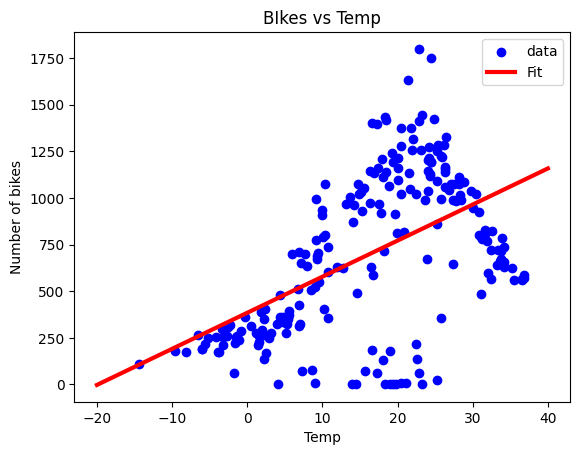

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label='data', color = 'blue')
x = tf.linspace(-20,40,100) #evenly spaced values in range (-20,40) 100 of those
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)), label ='Fit', color= 'red', linewidth=3)
plt.legend()
plt.title('BIkes vs Temp')
plt.ylabel('Number of bikes')
plt.xlabel('Temp')
plt.show()

# Multiple Linear Regression

In [97]:
_, x_train, y_train = get_xy(train, 'bike_count')
_, x_val, y_val = get_xy(valid, 'bike_count')
_, x_test, y_test = get_xy(test, 'bike_count')

In [68]:
all_reg = LinearRegression()
all_reg.fit(x_train, y_train)

LinearRegression()

In [69]:
all_reg.score(x_test, y_test)

0.54812994238632

# Regression with Neural Network

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

# Simple Regression with NN

In [72]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

c:\Users\Zenrich\Documents\sheesh\ml\.venv\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
temp_nn_model = tf.keras.Sequential(
    [
        temp_normalizer,
        tf.keras.layers.Dense(1)
    ]
)

In [74]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss = 'mean_squared_error')

In [ ]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    epochs = 1000,
    validation_data = (x_val_temp, y_val_temp)
)

In [ ]:
plot_loss(history)

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label='data', color = 'blue')
x = tf.linspace(-20,40,100) #evenly spaced values in range (-20,40) 100 of those
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)), label ='Fit', color= 'red', linewidth=3)
plt.legend()
plt.title('BIkes vs Temp')
plt.ylabel('Number of bikes')
plt.xlabel('Temp')
plt.show()

# Multi Regression with NN

In [127]:
all_normalizer = tf.keras.layers.Normalization(axis=-1)
all_normalizer.adapt(x_train)

In [128]:
all_nn_model = tf.keras.Sequential(
    [
        all_normalizer,
        tf.keras.layers.Dense(1)
    ]
)

In [129]:
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss = 'mse', auto_scale_loss=True)

In [ ]:
history = all_nn_model.fit(
    x_train, y_train,
    epochs = 1000,
    validation_split = 0.2
)

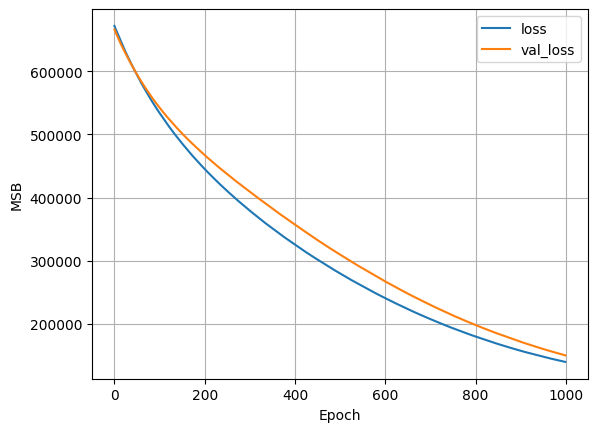

In [131]:
plot_loss(history)